In [ ]:
# import os
# from google.colab import drive

# # Mount Google Drive
# drive.mount('/content/drive')

# # Set the directory path that you want to delete files from
# dir_path = '/content/drive/MyDrive/json_files2/'

# # Set the file prefix that you want to delete
# file_prefix = 'max_'

# # Loop through all files and directories in the specified directory path
# for root, dirs, files in os.walk(dir_path):
#     for file in files:
#         # Check if the file starts with the specified file prefix
#         if file.startswith(file_prefix):
#             # Get the full file path
#             file_path = os.path.join(root, file)
#             # Delete the file
#             os.remove(file_path)
#             print(f"{file_path} deleted.")


In [ ]:
import json
import os
from google.colab import drive

drive.mount('/content/drive')
json_dir = '/content/drive/MyDrive/json_files_2/'

throughput_dict = {}

for subdir, dirs, files in os.walk(json_dir):
    for file in files:
        if file.endswith('.json'):
            file_path = os.path.join(subdir, file)
            with open(file_path) as f:
                data = json.load(f)
                new_data = {}
                messageSize = None
                driver = None
                for key, value in data.items():
                    if key == "messageSize":
                        messageSize = value
                        new_data[key] = value
                        if str(messageSize) not in throughput_dict:
                          throughput_dict[str(messageSize)] = []
                          continue
                    elif key == "driver":
                      driver = value
                      continue
                    if isinstance(value, list):
                        new_data[key] = max(value)
                        if key == "publishRate":
                            new_data[key] *= messageSize
                            new_data[key] /= (1024 * 1024)
                            throughput_dict[str(messageSize)].append({driver: new_data[key]})
                    else:
                        new_data[key] = value
                # set the path to the new file with the same name as the original file
                # new_file_path = os.path.join(subdir, f'max_{file}')
                # with open(new_file_path, 'w') as new_f:
                #     json.dump(new_data, new_f)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Latency/latency_graphs/
# !pwd
!mkdir new_throughput
%cd new_throughput
# !pwd

/content/drive/MyDrive/Latency/latency_graphs
mkdir: cannot create directory ‘new_throughput’: File exists
/content/drive/MyDrive/Latency/latency_graphs/new_throughput


In [ ]:
sorted_dict = dict(sorted(throughput_dict.items(), key=lambda x: int(x[0])))
for k, v in sorted_dict.items():
    sorted_dict[k] = sorted(v, key=lambda x: list(x.values())[0])

In [ ]:
# print(file_sizes)

In [ ]:
file_sizes = sorted_dict.keys()
artemis = []
rabbitmq = []
redis = []
new_dict = {'Artemis': 0, 'RabbitMQ': 1, 'Redis': 2}
file_sizes = list(file_sizes)

for size in file_sizes:
    key = size
    values = sorted_dict[str(key)]
    for litem in values:
      for nkey, val in litem.items():
        idx = new_dict[nkey]
        if idx == 0: 
          artemis.append(round(val, 2))
        if idx == 1: 
          rabbitmq.append(round(val, 2))
        if idx == 2: 
          redis.append(round(val, 2))

In [ ]:
rabbitmq

[0.88, 8.71, 81.45, 553.64, 1237.41, 1779.45]

In [ ]:
artemis

[0.07, 0.76, 5.74, 13.67, 19.01, 2.08]

In [ ]:
redis

[0.33, 2.78, 27.08, 123.29, 161.07, 210.71]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker

In [ ]:
artemis

[0.07, 0.76, 5.74, 13.67, 19.01, 2.08]

In [ ]:
rabbitmq

[0.88, 8.71, 81.45, 553.64, 1237.41, 1779.45]

In [ ]:
redis

[0.33, 2.78, 27.08, 123.29, 161.07, 210.71]

In [ ]:
file_sizes

['10', '100', '1024', '10240', '51200', '102400']

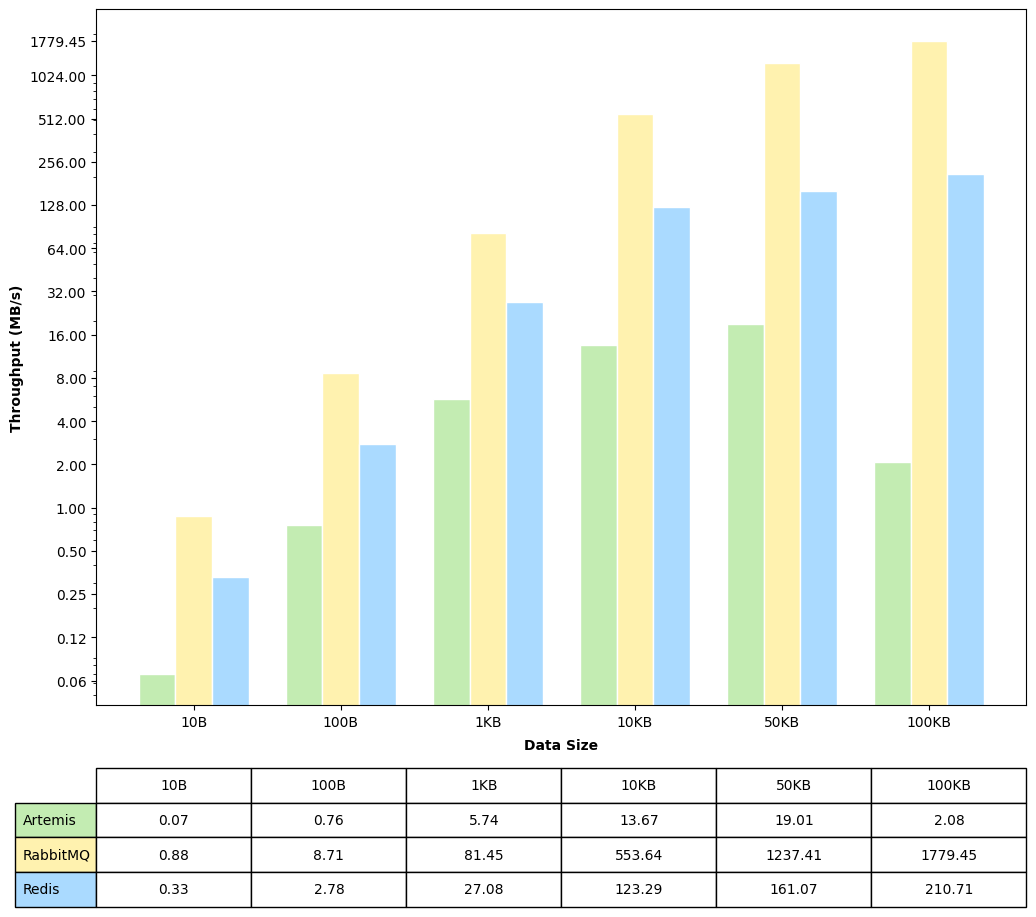

In [ ]:
bar_width = 0.25
r1 = np.arange(len(file_sizes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# file_sizes = ['100B', '200B', '400B', '1KB', '2KB', '4KB']
file_sizes = ['10B', '100B', '1KB', '10KB', '50KB', '100KB']


fig, ax = plt.subplots(figsize=(12, 12))

# Make the plot
artemis_bars = ax.bar(r1, artemis, color='#C3ECB2', width=bar_width, edgecolor='white', label='Artemis')
rabbitmq_bars = ax.bar(r2, rabbitmq, color='#FFF2AF', width=bar_width, edgecolor='white', label='RabbitMQ')
redis_bars = ax.bar(r3, redis, color='#AADAFF', width=bar_width, edgecolor='white', label='Redis')

# Add xticks on the middle of the group bars
ax.set_xlabel('Data Size', fontweight='bold')
ax.set_ylabel('Throughput (MB/s)', fontweight='bold')

# ax.set_xlabel('Message Size in Bytes', fontweight='bold')
# ax.set_ylabel('Throughput in Events/Seconds', fontweight='bold')

ax.set_xticks([r + bar_width for r in range(len(file_sizes))])
ax.set_xticklabels(file_sizes)
ax.xaxis.labelpad = 7
# ax.legend(loc='upper left')

y_values = [artemis, rabbitmq, redis]
legend_colors = ['#C3ECB2', '#FFF2AF', '#AADAFF']

# Create custom legend rows
legend_rows = [Line2D([0], [0], color=color, linewidth=4, linestyle='-') for color in legend_colors]

ax.table(cellText=y_values,
         rowLabels=['Artemis', 'RabbitMQ', 'Redis'],
         rowColours=legend_colors,
         cellLoc='center',
         rowLoc='left',
         loc='bottom',
         bbox=[0, -0.29, 1, 0.2],
         colWidths=[0.1] * len(file_sizes),
         colLabels=file_sizes)


y_min = min([min(lst) for lst in [artemis, rabbitmq, redis]])
y_max = max([max(lst) for lst in [artemis, rabbitmq, redis]])

# plt.yticks(np.arange(0, y_max, 5000.0))

# y_min = 0.07
# y_max = 260
ax.set_yscale('log')

# y_ticks = [y_min] + [1, 5, 15, 30, 50, 90, 180, 250]
y_ticks = [2**i for i in range(int(np.floor(np.log2(y_min))), int(np.ceil(np.log2(y_max))))] + [y_max]
y_tick_labels = [f"{y:.2f}" for y in y_ticks]
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)


# Adjust spacing between subplots
plt.subplots_adjust(bottom=0.3)

# Show plot
# plt.show()

plt.savefig('new_max_throughput.pdf', dpi=300, bbox_inches='tight', facecolor='white')
# plt.savefig('old_throughput.png', dpi=300, bbox_inches='tight', facecolor='white')

